In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_vae
from autoencoder import network_vae
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datadir = "/v/Data/cyto/mmCompensatedTifs/"
#datadir = "/media/cjw/Data/cyto/mmCompensatedTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/v/Data/cyto/mmCompensatedTifs/Fish4_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish3_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish4_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish1_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish2_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish2_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish5_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish1_Ice.mm', '/v/Data/cyto/mmCompensatedTifs/Fish6_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish3_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish4_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish6_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish3_ICE.mm', '/v/Data/cyto/mmCompensatedTifs/Fish6_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish2_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish5_Untreated.mm', '/v/Data/cyto/mmCompensatedTifs/Fish1_CCB.mm', '/v/Data/cyto/mmCompensatedTifs/Fish5_ICE.mm']
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64     5]
(4,) [10000    64    64 

dict_keys(['Fish4_Untreated.mm', 'Fish3_CCB.mm', 'Fish4_CCB.mm', 'Fish1_Untreated.mm', 'Fish2_ICE.mm', 'Fish2_CCB.mm', 'Fish5_CCB.mm', 'Fish1_Ice.mm', 'Fish6_CCB.mm', 'Fish3_Untreated.mm', 'Fish4_ICE.mm', 'Fish6_ICE.mm', 'Fish3_ICE.mm', 'Fish6_Untreated.mm', 'Fish2_Untreated.mm', 'Fish5_Untreated.mm', 'Fish1_CCB.mm', 'Fish5_ICE.mm'])

In [ ]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32) (?, 32, 32, 3)
isize:  4 32
dh0 (?, 32, 32, 3)
180000 1406 128
Epoch:  0 Iteration:  0 Loss:  102.343895 0.8378135 101.50609


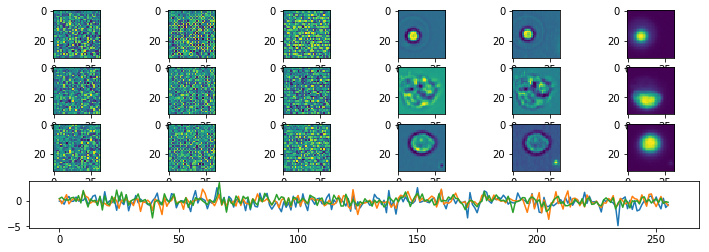

Epoch:  0 Iteration:  200 Loss:  0.80998623 0.6558207 0.1541655


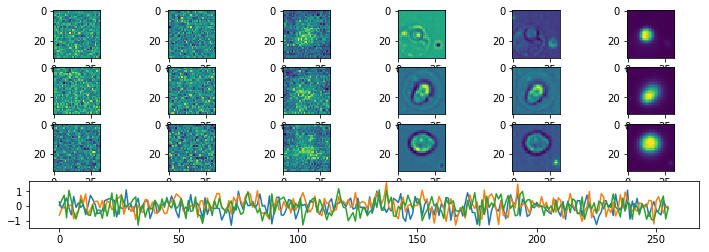

Epoch:  0 Iteration:  400 Loss:  0.7525684 0.6551264 0.097442016


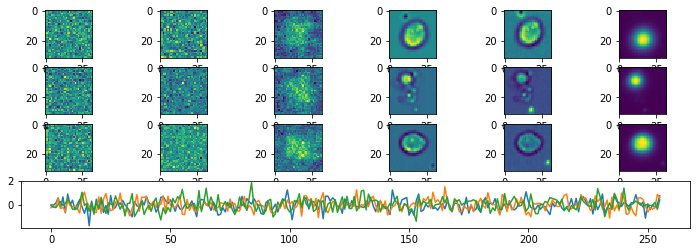

Epoch:  0 Iteration:  600 Loss:  0.7299211 0.65425485 0.07566616


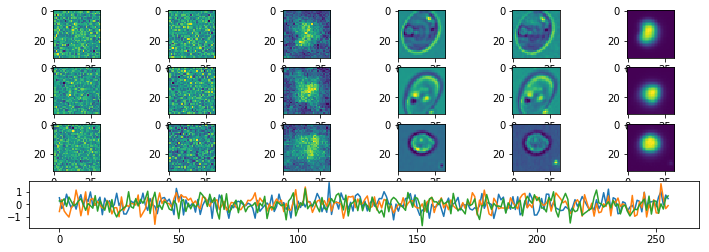

Epoch:  0 Iteration:  800 Loss:  0.7153144 0.6543437 0.060970575


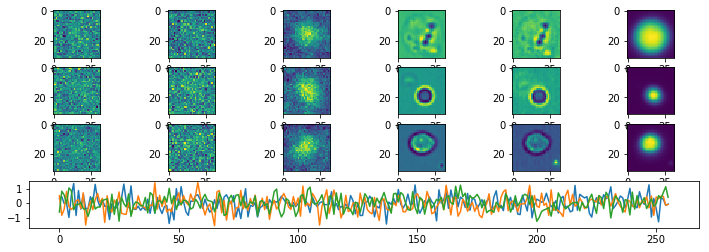

Epoch:  0 Iteration:  1000 Loss:  0.70487034 0.6541415 0.05072897


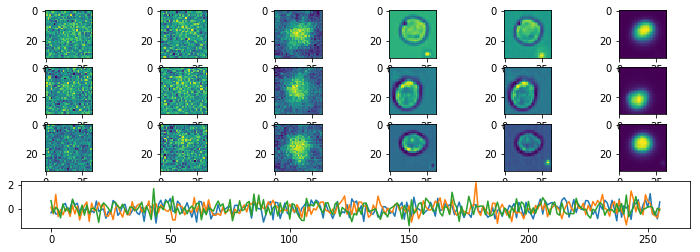

Epoch:  0 Iteration:  1200 Loss:  0.69631195 0.6545234 0.04178858


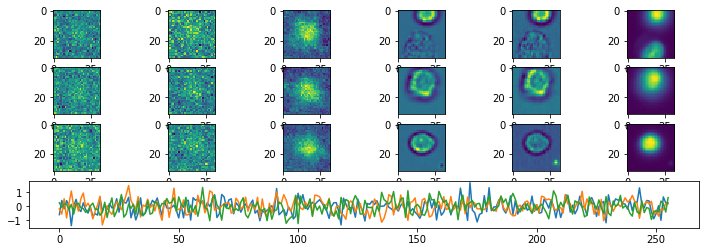

Epoch:  0 Iteration:  1400 Loss:  0.68952864 0.6541769 0.035351783


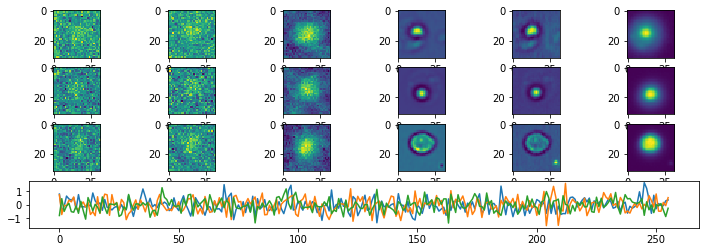

Epoch:  1 Iteration:  0 Loss:  0.6891359 0.65392846 0.035207514


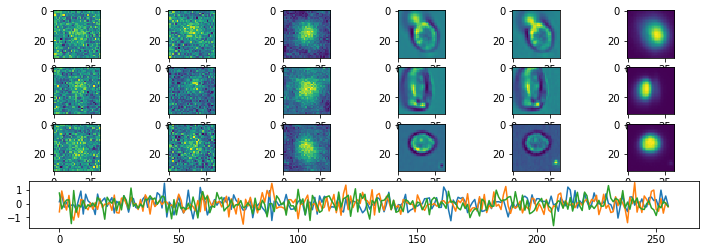

Epoch:  1 Iteration:  200 Loss:  0.682557 0.6538852 0.028671816


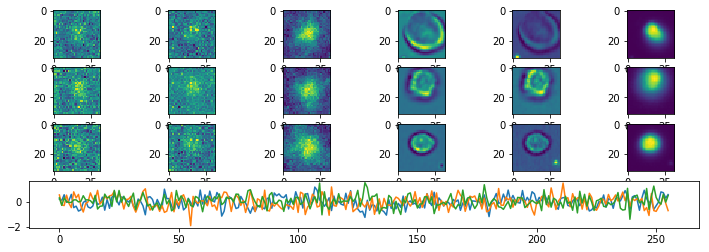

Epoch:  1 Iteration:  400 Loss:  0.6786389 0.6543134 0.024325456


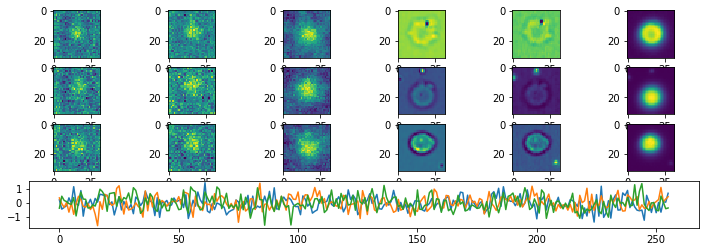

Epoch:  1 Iteration:  600 Loss:  0.67364883 0.6537066 0.019942196


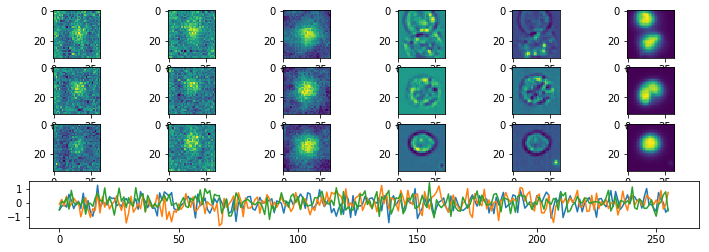

Epoch:  1 Iteration:  800 Loss:  0.6709008 0.6539098 0.016991004


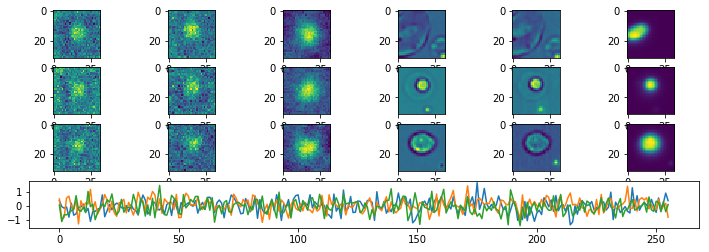

Epoch:  1 Iteration:  1000 Loss:  0.6680532 0.65379906 0.014254134


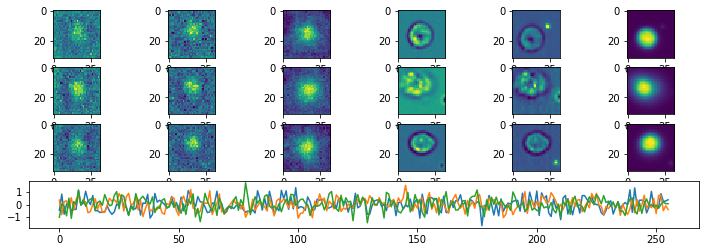

Epoch:  1 Iteration:  1200 Loss:  0.6665621 0.654318 0.01224406


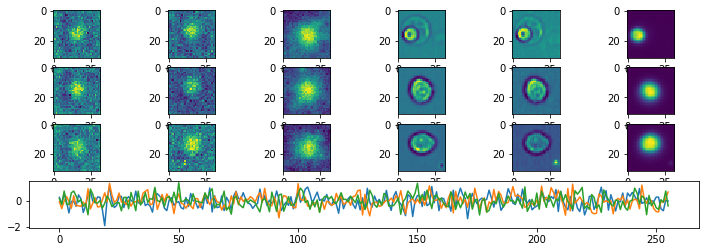

Epoch:  1 Iteration:  1400 Loss:  0.6643467 0.6539856 0.01036109


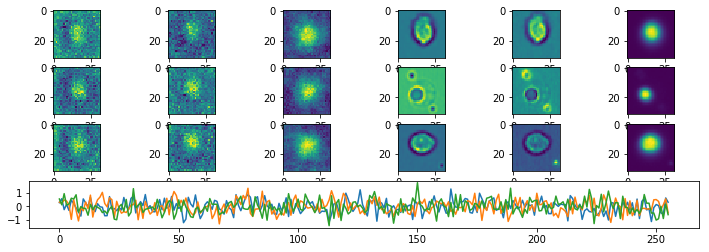

Epoch:  2 Iteration:  0 Loss:  0.66383153 0.6537324 0.010099068


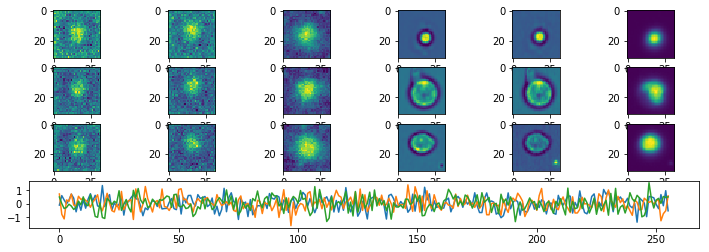

Epoch:  2 Iteration:  200 Loss:  0.66198653 0.6537255 0.008260991


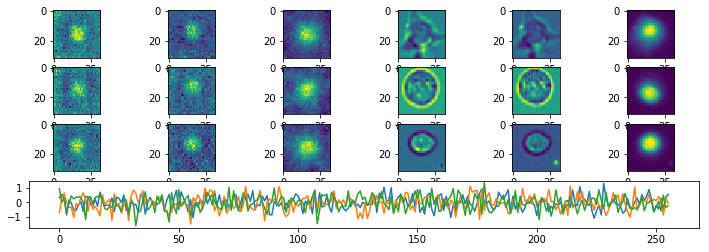

Epoch:  2 Iteration:  400 Loss:  0.6612155 0.6541836 0.0070318477


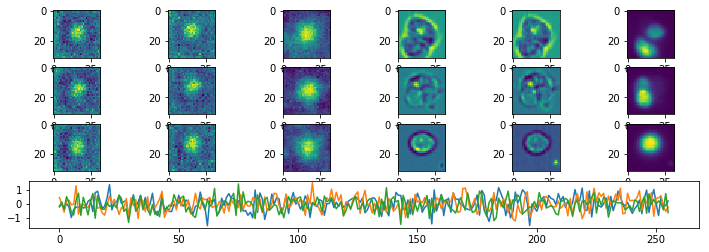

Epoch:  2 Iteration:  600 Loss:  0.65959954 0.6535814 0.0060181646


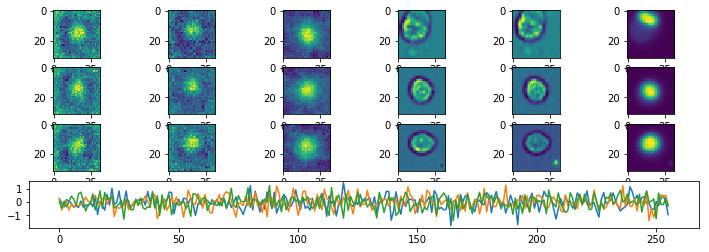

Epoch:  2 Iteration:  800 Loss:  0.6588036 0.65382344 0.004980161


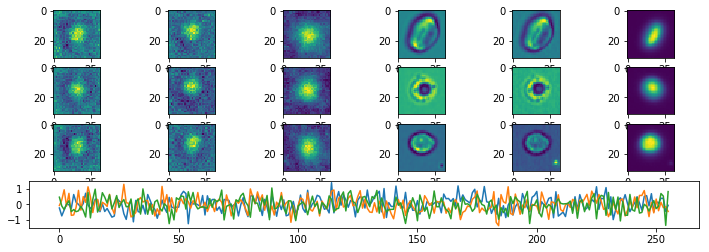

Epoch:  2 Iteration:  1000 Loss:  0.6580553 0.6537231 0.00433218


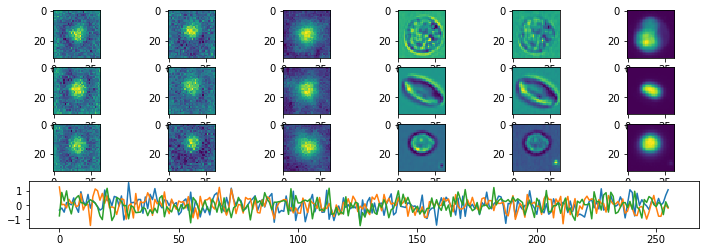

Epoch:  2 Iteration:  1200 Loss:  0.65804327 0.65420794 0.003835296


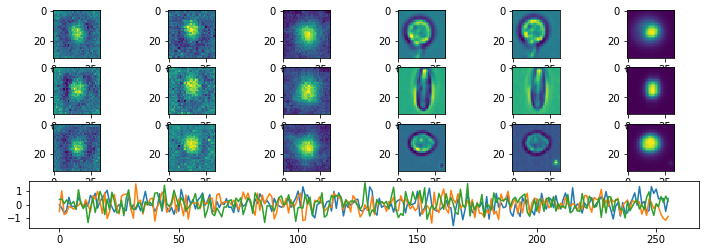

In [ ]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 3
p_channels = [0, 3 , 4]
p_nepochs = 100
p_batchsize = 128
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 256 #128 + 64
p_droprate = 0.95
p_stdev = .06
p_slam = .0005
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/v/Data/cyto/Checkpoints/2018-06-05-Cyto-VAE"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_vae.train(p_mmdict, p_df, params, 200, cpdir)

In [ ]:
x = 4
x